# Imports

In [51]:
import os
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer

In [52]:
# Carregando as configurações do arquivo 'config_modelo.json'
configs = json.load(open('config_modelo.json', 'r'))

In [53]:
# Criar a pasta 'save_dir' caso não exista no diretório
if not os.path.exists(configs['model']['save_dir']):
            os.makedirs(configs['model']['save_dir'])

In [54]:
# Carregar o Dataset
filepath = 'C:/Users/auW10/Documents/CodigosDoAu/000_Doutorado/dataset/'
df = pd.read_pickle(filepath+'dataset_with_TI_ciclo1_multiclass_jupyter_aug_dim_53TIs.pkl')
print(df.shape)
df.head(20)

(139881, 71)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,EMA_5_CLOSE,EMA_10_CLOSE,...,MES,DIA_SEMANA,HORA_NOBRE,TARGET_WIN,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL,TARGET_WIN_CAT_ENC,HOLD,SELL,BUY
0,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53462.598377,53394.139577,...,11,2,2,15.0,HOLD,2,1,1,0,0
1,2014-11-19 12:35:00,2014.11.19,12:35:00,53410.0,53500.0,53295.0,53415.0,7034.0,53446.732251,53397.932381,...,11,2,2,50.0,HOLD,2,1,1,0,0
2,2014-11-19 12:40:00,2014.11.19,12:40:00,53420.0,53495.0,53370.0,53490.0,4654.0,53461.154834,53414.671948,...,11,2,2,-80.0,HOLD,2,1,1,0,0
3,2014-11-19 12:45:00,2014.11.19,12:45:00,53495.0,53595.0,53410.0,53425.0,5518.0,53449.103223,53416.549776,...,11,2,2,-140.0,HOLD,2,1,1,0,0
4,2014-11-19 12:50:00,2014.11.19,12:50:00,53420.0,53545.0,53415.0,53465.0,3800.0,53454.402148,53425.358908,...,11,2,2,-195.0,SELL,1,2,0,1,0
5,2014-11-19 12:55:00,2014.11.19,12:55:00,53465.0,53525.0,53385.0,53410.0,2793.0,53439.601432,53422.566379,...,11,2,2,-225.0,SELL,1,2,0,1,0
6,2014-11-19 13:00:00,2014.11.19,13:00:00,53410.0,53435.0,53245.0,53285.0,5022.0,53388.067622,53397.554310,...,11,2,2,-140.0,HOLD,2,1,1,0,0
7,2014-11-19 13:05:00,2014.11.19,13:05:00,53285.0,53325.0,53195.0,53270.0,3724.0,53348.711748,53374.362617,...,11,2,2,-130.0,HOLD,2,1,1,0,0
8,2014-11-19 13:10:00,2014.11.19,13:10:00,53260.0,53305.0,53155.0,53185.0,4687.0,53294.141165,53339.933051,...,11,2,2,-125.0,HOLD,2,1,1,0,0
9,2014-11-19 13:15:00,2014.11.19,13:15:00,53190.0,53205.0,53100.0,53145.0,4140.0,53244.427443,53304.490678,...,11,2,2,-95.0,HOLD,2,1,1,0,0


## Split dos Dados

In [55]:
df.columns.tolist()

['DATETIME',
 'DATE',
 'TIME',
 'OPEN',
 'HIGH',
 'LOW',
 'CLOSE',
 'VOL',
 'EMA_5_CLOSE',
 'EMA_10_CLOSE',
 'EMA_20_CLOSE',
 'EMA_5_OPEN',
 'EMA_10_OPEN',
 'EMA_20_OPEN',
 'EMA_5_HIGH',
 'EMA_10_HIGH',
 'EMA_20_HIGH',
 'EMA_5_LOW',
 'EMA_10_LOW',
 'EMA_20_LOW',
 'KAMA_5',
 'KAMA_10',
 'KAMA_20',
 'MIDPOINT_3',
 'MIDPOINT_12',
 'MIDPRICE_3',
 'MIDPRICE_12',
 'TRIMA_5',
 'TRIMA_10',
 'TRIMA_20',
 'ADX_3',
 'ADX_6',
 'ADX_10',
 'BOP',
 'MOM_3',
 'MOM_6',
 'MOM_10',
 'MOM_14',
 'ROC_3',
 'ROC_5',
 'ROC_7',
 'ROC_10',
 'RSI_3',
 'RSI_6',
 'RSI_10',
 'RSI_14',
 'TRIX_3',
 'TRIX_5',
 'TRIX_7',
 'WILLR_3',
 'WILLR_6',
 'WILLR_12',
 'WILLR_20',
 'AD',
 'ADOSC',
 'OBV',
 'ATR_3',
 'ATR_6',
 'ATR_12',
 'ATR_20',
 'TRANGE',
 'MES',
 'DIA_SEMANA',
 'HORA_NOBRE',
 'TARGET_WIN',
 'TARGET_WIN_CAT3',
 'TARGET_WIN_CAT3_LABEL',
 'TARGET_WIN_CAT_ENC',
 'HOLD',
 'SELL',
 'BUY']

In [56]:
print(df.shape)
df2 = df.drop([  'MES',
                 'DIA_SEMANA', 
                 'TARGET_WIN',   
                 'TARGET_WIN_CAT_ENC',
                 'HOLD',
                 'SELL',
                 'BUY'
               
              ], axis=1)
print(df2.shape)
df2.head(2)

(139881, 71)
(139881, 64)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,EMA_5_CLOSE,EMA_10_CLOSE,...,ADOSC,OBV,ATR_3,ATR_6,ATR_12,ATR_20,TRANGE,HORA_NOBRE,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL
0,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53462.598377,53394.139577,...,224.882410,16995.0,183.08836,157.567344,133.163314,122.7500,160.0,2,HOLD,2
1,2014-11-19 12:35:00,2014.11.19,12:35:00,53410.0,53500.0,53295.0,53415.0,7034.0,53446.732251,53397.932381,...,-968.557883,24029.0,190.39224,165.472787,139.149704,126.8625,205.0,2,HOLD,2


In [57]:
#df_train = df2[(df2['DATETIME'] >= '2014-01-01') & (df2['DATETIME'] < '2018-01-01')]
df_train = df2[(df2['DATETIME'] >= '2017-12-01') & (df2['DATETIME'] < '2019-07-01')]
#df_train = df_train.iloc[-10000:, :]

#df_valid = df2[(df2['DATETIME'] >= '2018-01-01') & (df2['DATETIME'] < '2019-01-01')]
df_valid = df2[(df2['DATETIME'] >= '2019-07-01') & (df2['DATETIME'] < '2020-01-01')]
#df_valid = df_valid.iloc[:6600, :]

#df_test  = df2[(df2['DATETIME'] >= '2019-01-01')]
df_test  = df2[(df2['DATETIME'] >= '2020-01-01')]
#df_test  = df2[(df2['DATETIME'] < '2017-12-01')]
#df_test = df_test.iloc[:500,:]

print('Proporção Train: {:.1%} | Validation: {:.1%} | Test: {:.1%}'.format(
                                            df_train['OBV'].count()/df2['OBV'].count(),
                                            df_valid['OBV'].count()/df2['OBV'].count(),
                                            df_test['OBV'].count()/df2['OBV'].count()))

df_train.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_valid.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_test.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
print(df_train.shape, df_valid.shape, df_test.shape)

Proporção Train: 29.8% | Validation: 9.7% | Test: 2.9%
(41643, 61) (13596, 61) (4064, 61)


C:\Users\auW10\Anaconda3\envs\phd\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
df_test.iloc[19:200].head(20)

,OPEN,HIGH,LOW,CLOSE,VOL,EMA_5_CLOSE,EMA_10_CLOSE,EMA_20_CLOSE,EMA_5_OPEN,EMA_10_OPEN,...,ADOSC,OBV,ATR_3,ATR_6,ATR_12,ATR_20,TRANGE,HORA_NOBRE,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL
135836,117325.0,117425.0,117260.0,117400.0,87105.0,117228.122937,117137.461639,117010.529854,117142.182637,117084.640892,...,95344.558922,-7850190.0,212.171216,205.912372,197.823329,186.913789,165.0,1,HOLD,2
135837,117400.0,117440.0,117365.0,117415.0,59672.0,117290.415292,117187.923159,117049.050821,117228.121758,117141.978911,...,108119.650258,-7790518.0,166.447477,184.093643,187.588051,181.318099,75.0,1,BUY,0
135838,117420.0,117465.0,117365.0,117400.0,56267.0,117326.943528,117226.482585,117082.474552,117292.081172,117192.528200,...,99364.488880,-7846785.0,144.298318,170.078036,180.289047,177.252194,100.0,1,BUY,0
135839,117405.0,117520.0,117400.0,117510.0,72601.0,117387.962352,117278.031206,117123.191261,117329.720781,117231.159436,...,108959.556075,-7774184.0,136.198879,161.731697,175.264960,174.389585,120.0,1,HOLD,2
135840,117515.0,117575.0,117470.0,117570.0,72648.0,117448.641568,117331.116441,117165.744475,117391.480521,117282.766812,...,127389.898872,-7701536.0,125.799252,152.276414,169.409546,170.920105,105.0,1,HOLD,2
135841,117570.0,117625.0,117530.0,117595.0,74275.0,117497.427712,117379.095270,117206.625953,117450.987014,117334.991028,...,134860.446417,-7627261.0,115.532835,142.730345,163.208751,167.124100,95.0,1,HOLD,2
135842,117595.0,117635.0,117555.0,117570.0,64280.0,117521.618475,117413.805221,117241.233005,117498.991343,117382.265386,...,113740.451424,-7691541.0,103.688557,132.275287,156.274688,162.767895,80.0,1,HOLD,2
135843,117570.0,117665.0,117530.0,117575.0,87807.0,117539.412316,117443.113363,117273.020338,117522.660895,117416.398952,...,85924.226509,-7603734.0,114.125704,132.729406,154.501798,161.379500,135.0,1,HOLD,2
135844,117580.0,117635.0,117565.0,117570.0,40846.0,117549.608211,117466.183660,117301.304115,117541.773930,117446.144597,...,55427.124918,-7644580.0,99.417136,122.274505,147.459981,156.810525,70.0,1,BUY,0
135845,117570.0,117660.0,117550.0,117600.0,54979.0,117566.405474,117490.513904,117329.751343,117551.182620,117468.663762,...,36530.771629,-7589601.0,102.944758,120.228754,144.338316,154.469999,110.0,1,BUY,0


In [59]:
df_train['TARGET_WIN_CAT3_LABEL'].value_counts()

2    28204
0     6776
1     6663
Name: TARGET_WIN_CAT3_LABEL, dtype: int64

In [60]:
df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[0]

6776

In [61]:
hold_train = df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[2]
hold_valid = df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[2]
hold_test = df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[2]

print('\nDados Categóricos de Treino -- BUY: %d | SELL: %d | HOLD: %d' % (df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_train))
print('\nDados Categóricos de Validação -- BUY: %d | SELL: %d | HOLD: %d' % (df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_valid))
print('\nDados Categóricos de Teste -- BUY: %d | SELL: %d | HOLD: %d' % (df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_test))



Dados Categóricos de Treino -- BUY: 6776 | SELL: 6663 | HOLD: 28204

Dados Categóricos de Validação -- BUY: 1912 | SELL: 1784 | HOLD: 9900

Dados Categóricos de Teste -- BUY: 741 | SELL: 727 | HOLD: 2596


In [62]:
buy_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

buy_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

buy_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

print('\nDados Categóricos de Treino Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_train, sell_train, hold_train))
print('\nDados Categóricos de Validação Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_valid, sell_valid, hold_valid))
print('\nDados Categóricos de Teste Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_test, sell_test, hold_test))



Dados Categóricos de Treino Hora Nobre -- BUY: 2245 | SELL: 2232 | HOLD: 7043

Dados Categóricos de Validação Hora Nobre -- BUY: 724 | SELL: 702 | HOLD: 2354

Dados Categóricos de Teste Hora Nobre -- BUY: 250 | SELL: 242 | HOLD: 618


In [63]:
df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()

HORA_NOBRE  TARGET_WIN_CAT3_LABEL
0           2                         1607
            1                          359
            0                          333
1           2                         7043
            0                         2245
            1                         2232
2           2                        19554
            0                         4198
            1                         4072
Name: TARGET_WIN_CAT3_LABEL, dtype: int64

In [64]:
np.random.seed(2345)
porcentagem_selecao_train = (buy_train / hold_train)
amostra_train = np.random.choice( a=[0,1], size=hold_train, replace=True, 
                                   p=[1-porcentagem_selecao_train, porcentagem_selecao_train] )
print(len(amostra_train))
print(len(amostra_train[amostra_train == 1]))
print(len(amostra_train[amostra_train == 0]))

7043
2243
4800


In [65]:
np.random.seed(2345)
porcentagem_selecao_valid = (buy_valid / hold_valid)
amostra_valid = np.random.choice( a=[0,1], size=hold_valid, replace=True, 
                                   p=[1-porcentagem_selecao_valid, porcentagem_selecao_valid] )
print(len(amostra_valid))
print(len(amostra_valid[amostra_valid == 1]))
print(len(amostra_valid[amostra_valid == 0]))

2354
719
1635


In [66]:
np.random.seed(2345)
porcentagem_selecao_test = (buy_test / hold_test)
amostra_test = np.random.choice( a=[0,1], size=hold_test, replace=True, 
                                   p=[1-porcentagem_selecao_test, porcentagem_selecao_test] )
print(len(amostra_test))
print(len(amostra_test[amostra_test == 1]))
print(len(amostra_test[amostra_test == 0]))

618
253
365


In [67]:
def normalize(data):

        scaler_x = StandardScaler()
        
        x = data.iloc[:, :-3]
        x = scaler_x.fit_transform(x) 
        
        y = data.iloc[:,-1]
        y_list = np.array(y.to_list())
    
        return x, y_list

In [68]:
def get_train_valid_test_data(seq_len, df, amostragem):

        a=0
        for i in range(len(df) - seq_len):
            if df['TARGET_WIN_CAT3'][i+seq_len-1] == 'HOLD':
                if amostragem[a] == 0:
                    df.drop((i+seq_len-1), axis=0, inplace=True) 
                a+=1
                    
        x, y = normalize(df)
            
        return x, y

In [69]:
df_train_reset_index = df_train[df_train['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_train, y_train = get_train_valid_test_data(seq_len=1, 
                                             df=df_train_reset_index, 
                                             amostragem=amostra_train)

In [70]:
df_valid_reset_index = df_valid[df_valid['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_valid, y_valid = get_train_valid_test_data(seq_len=1, 
                                             df=df_valid_reset_index, 
                                             amostragem=amostra_valid)

In [71]:
df_test_reset_index = df_test[df_test['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_test, y_test = get_train_valid_test_data(seq_len=1, 
                                             df=df_test_reset_index, 
                                             amostragem=amostra_test)

In [72]:
len(x_train)

6721

In [73]:
len(y_train)

6721

In [74]:
x_train.shape

(6721, 58)

In [75]:
x_train

array([[-1.77450308, -1.77818379, -1.7837574 , ..., -0.24582561,
        -0.20038911,  0.52833382],
       [-1.77631092, -1.78179939, -1.77230876, ..., -0.2699237 ,
        -0.20861249, -0.87092677],
       [-1.77390046, -1.75588761, -1.76327036, ..., -0.14441967,
        -0.12431777,  0.69624509],
       ...,
       [ 1.90205189,  1.9000841 ,  1.90752376, ..., -0.39836397,
        -0.37493196, -0.7030155 ],
       [ 1.89723097,  1.8952633 ,  1.90451097, ..., -0.47433162,
        -0.42114658, -0.87092677],
       [ 1.90024405,  1.89164771,  1.89969049, ..., -0.52881327,
        -0.45513436, -0.75898592]])

In [76]:
y_train

array([0, 2, 0, ..., 1, 1, 2])

# Modelos

In [77]:
import lightgbm as lgbm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LightGBM

In [78]:
model_lgbm = lgbm.LGBMClassifier(n_jobs=-1, random_state=0, n_estimators=10000, learning_rate=0.001, num_leaves=2**6,
                                subsample=0.9, subsample_freq=1, colsample_bytree=1.)

model_lgbm.fit(x_train, y_train)
predict_lgbm = model_lgbm.predict(x_test)

print('Accuracy Score - LightGBM: ', accuracy_score(y_test, predict_lgbm))

Accuracy Score - LightGBM:  0.3597315436241611


In [79]:
print(classification_report(y_test, predict_lgbm))

              precision    recall  f1-score   support

           0       0.34      0.32      0.33       250
           1       0.34      0.32      0.33       242
           2       0.39      0.43      0.41       253

    accuracy                           0.36       745
   macro avg       0.36      0.36      0.36       745
weighted avg       0.36      0.36      0.36       745



In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_lgbm)
confusion_matrix

array([[ 81,  84,  85],
       [ 82,  78,  82],
       [ 76,  68, 109]], dtype=int64)

In [81]:
len(y_test)

745

<AxesSubplot:>

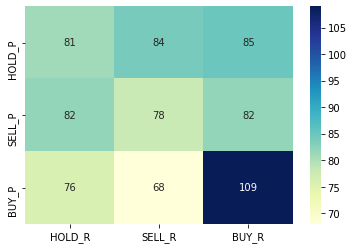

In [82]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['HOLD_R', 'SELL_R', 'BUY_R'], 
                        index=['HOLD_P', 'SELL_P', 'BUY_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [83]:
y_pred_train = model_lgbm.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9981


### Check for Overfitting

In [84]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lgbm.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_lgbm.score(x_test, y_test)))

Training set score: 0.9981
Test set score: 0.3597


In [85]:
print('Validation set score: {:.4f}'.format(model_lgbm.score(x_valid, y_valid)))

Validation set score: 0.3888


## Random Forest

In [86]:
model_randomF = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=15000)
model_randomF.fit(x_train, y_train)
predict_randomF = model_randomF.predict(x_test)

print('Accuracy Score - Random Forest: ', accuracy_score(y_test, predict_randomF))

Accuracy Score - Random Forest:  0.3516778523489933


In [87]:
print(classification_report(y_test, predict_randomF))

              precision    recall  f1-score   support

           0       0.34      0.31      0.32       250
           1       0.34      0.34      0.34       242
           2       0.38      0.40      0.39       253

    accuracy                           0.35       745
   macro avg       0.35      0.35      0.35       745
weighted avg       0.35      0.35      0.35       745



In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_randomF)
confusion_matrix

array([[ 77,  88,  85],
       [ 75,  83,  84],
       [ 75,  76, 102]], dtype=int64)

<AxesSubplot:>

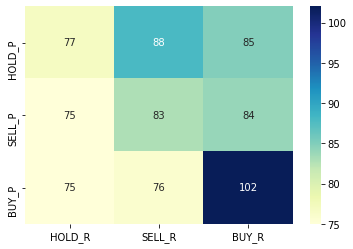

In [89]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['HOLD_R', 'SELL_R', 'BUY_R'], 
                        index=['HOLD_P', 'SELL_P', 'BUY_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [90]:
y_pred_train = model_randomF.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


### Check for Overfitting

In [91]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_randomF.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_randomF.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.3517


In [92]:
print('Validation set score: {:.4f}'.format(model_randomF.score(x_valid, y_valid)))

Validation set score: 0.4005


# Deep Learning

In [128]:
# Encoding categorical data
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_train)
y_train2 = to_categorical(yy)

labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_test)
y_test2 = to_categorical(yy)

labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_valid)
y_valid2 = to_categorical(yy)

print(y_valid2[10:20])
print(y_valid[10:20])

# BUY | SELL | HOLD

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[2 1 2 1 1 2 2 0 0 0]


In [94]:
# example of training a final classification model
from keras.models import Sequential, load_model
from core.utils import Timer
from keras.layers import Dense, Dropout, LSTM, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, Adam
dim = x_train.shape[1]

## DNN

In [95]:
# define and fit the final model
timer = Timer()
timer.start()

model_dnn = Sequential()

model_dnn.add(Dense(100, input_dim=dim, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(75, activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(50, activation='relu'))
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(25, activation='relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(3, activation='softmax'))

model_dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
print(model_dnn.summary())
timer.stop()


[model] Model Compiled
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               5900      
_________________________________________________________________
dropout_35 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 75)                7575      
_________________________________________________________________
dropout_36 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                3800      
_________________________________________________________________
dropout_37 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (N

In [97]:
timer = Timer()
timer.start()
print('[Model] Training Started')

save_dir=configs['model']['save_dir']
my_model=configs['model']['model_name']
save_fname = os.path.join(save_dir, '%s.h5' % my_model)

batch_size=configs['training']['batch_size']

callbacks = [ ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)]

H = model_dnn.fit( x_train, y_train2, validation_data=(x_valid, y_valid2), epochs=100, 
               callbacks=callbacks, workers=1 )

model_dnn.save(save_fname)

print('[Model] Training Completed.')
print('Model saved as %s' % save_fname)

timer.stop()

[Model] Training Started
Train on 6721 samples, validate on 2145 samples
Epoch 1/100
6721/6721 [==============================] - 12s 2ms/step - loss: 1.1164 - accuracy: 0.3428 - val_loss: 1.0879 - val_accuracy: 0.4023cy: 0.
Epoch 2/100
6721/6721 [==============================] - 6s 952us/step - loss: 1.0954 - accuracy: 0.3617 - val_loss: 1.0877 - val_accuracy: 0.3916TA: 5s - loss: 1.1045 - accuracy: 0.34 - ETA: 5s - loss: 1.1051 - accuracy:  - ETA: 5s - loss: 1.1053 - accu - - ETA: 3s - - ETA: 0s - loss: 1.0968 - accuracy - ETA: 0s - loss: 1.0964 - accura
Epoch 3/100
6721/6721 [==============================] - 6s 955us/step - loss: 1.0890 - accuracy: 0.3717 - val_loss: 1.0819 - val_accuracy: 0.3953s: 1.0907 - accuracy:  -
Epoch 4/100
6721/6721 [==============================] - 6s 927us/step - loss: 1.0860 - accuracy: 0.3807 - val_loss: 1.0798 - val_accuracy: 0.3823
Epoch 5/100
6721/6721 [==============================] - 7s 1ms/step - loss: 1.0825 - accuracy: 0.3854 - val_loss: 1.0

6721/6721 [==============================] - 5s 755us/step - loss: 1.0607 - accuracy: 0.4279 - val_loss: 1.0744 - val_accuracy: 0.41171s - loss: 1.0595 -  - ETA: 1s - loss: 1.0608 - accuracy:  - ETA: 1s - loss: 1.0601 - accura - ETA: 1s - loss: 1 - ETA: 0s - loss: 1.0602 - accu - ETA: 0s - loss: 1.0609 - accuracy: 0. - ETA: 0s - loss: 1.0606 - accuracy
Epoch 35/100
6721/6721 [==============================] - 8s 1ms/step - loss: 1.0565 - accuracy: 0.4362 - val_loss: 1.0761 - val_accuracy: 0.4093ac - - ETA: 1s - loss: 1.0 - ETA: 0s - loss: 1.0551  - ETA: 0s - loss: 1.056
Epoch 36/100
6721/6721 [==============================] - 6s 899us/step - loss: 1.0567 - accuracy: 0.4355 - val_loss: 1.0793 - val_accuracy: 0.4000
Epoch 37/100
6721/6721 [==============================] - 8s 1ms/step - loss: 1.0575 - accuracy: 0.4312 - val_loss: 1.0763 - val_accuracy: 0.4117s: 1.0581 - accura - ETA: 2s - loss: - ETA: 1s - loss: 1.0574 - accuracy:  - ETA: 1s - loss: 1.058 - ETA: 0s - loss: 1.056
Epoch 3

6721/6721 [==============================] - 4s 618us/step - loss: 1.0192 - accuracy: 0.4781 - val_loss: 1.0941 - val_accuracy: 0.3953
Epoch 76/100
6721/6721 [==============================] - 4s 521us/step - loss: 1.0179 - accuracy: 0.4746 - val_loss: 1.0974 - val_accuracy: 0.4023
Epoch 77/100
6721/6721 [==============================] - 4s 565us/step - loss: 1.0178 - accuracy: 0.4751 - val_loss: 1.0928 - val_accuracy: 0.3981
Epoch 78/100
6721/6721 [==============================] - 4s 557us/step - loss: 1.0223 - accuracy: 0.4700 - val_loss: 1.0955 - val_accuracy: 0.3995
Epoch 79/100
6721/6721 [==============================] - 4s 599us/step - loss: 1.0151 - accuracy: 0.4723 - val_loss: 1.0933 - val_accuracy: 0.3921
Epoch 80/100
6721/6721 [==============================] - 4s 632us/step - loss: 1.0151 - accuracy: 0.4809 - val_loss: 1.0963 - val_accuracy: 0.3963
Epoch 81/100
6721/6721 [==============================] - 4s 620us/step - loss: 1.0176 - accuracy: 0.4792 - val_loss: 1.0942 

In [136]:
# new instances where we do not know the answer
y_pred = model_dnn.predict(x_test) 
y_pred

array([[0.347215  , 0.25095665, 0.40182838],
       [0.38187173, 0.18703082, 0.43109745],
       [0.40597057, 0.0765046 , 0.51752484],
       ...,
       [0.42048   , 0.2705648 , 0.3089552 ],
       [0.3994276 , 0.3279448 , 0.27262765],
       [0.42214173, 0.25938597, 0.31847227]], dtype=float32)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


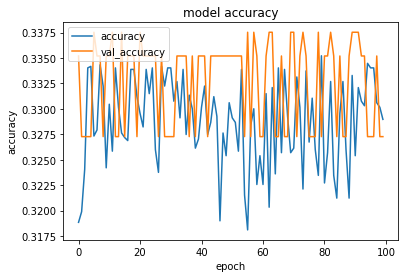

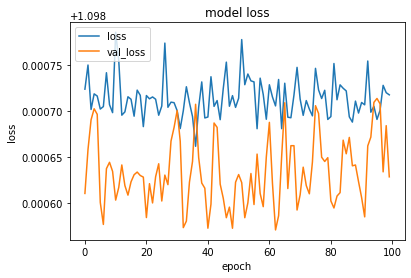

In [137]:
# list all data in history       
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
fig_path = 'accuracy_history.png'
plt.savefig(fig_path)     
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
fig_path = 'loss_history.png'
plt.savefig(fig_path) 
plt.show()

In [138]:
# BUY | SELL | HOLD

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_test2:
    real.append(np.argmax(i))
real_array = np.array(real)    

In [139]:
print(y_pred[10:20])
print(y_test2[10:20])

[[0.3601146  0.22267923 0.4172061 ]
 [0.3891599  0.22041884 0.39042124]
 [0.34004256 0.3184926  0.34146485]
 [0.37938052 0.12698558 0.4936339 ]
 [0.2968577  0.18638858 0.5167537 ]
 [0.26752418 0.250786   0.4816898 ]
 [0.33032152 0.21466841 0.45501006]
 [0.27354038 0.2889643  0.4374953 ]
 [0.27639085 0.36053044 0.36307868]
 [0.2748281  0.3602055  0.36496642]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [140]:
print(pred_array[10:20])
print(real_array[10:20])

[2 2 2 2 2 2 2 2 2 2]
[0 0 2 2 0 0 0 0 0 0]


In [141]:
print('Accuracy Score - DL: ', accuracy_score(real_array, pred_array))

Accuracy Score - DL:  0.374496644295302


In [142]:
print(classification_report(real_array, pred_array))

              precision    recall  f1-score   support

           0       0.36      0.45      0.40       250
           1       0.40      0.32      0.35       242
           2       0.38      0.36      0.37       253

    accuracy                           0.37       745
   macro avg       0.38      0.37      0.37       745
weighted avg       0.38      0.37      0.37       745



In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(real_array, pred_array)
confusion_matrix

array([[112,  55,  83],
       [ 98,  77,  67],
       [101,  62,  90]], dtype=int64)

<AxesSubplot:>

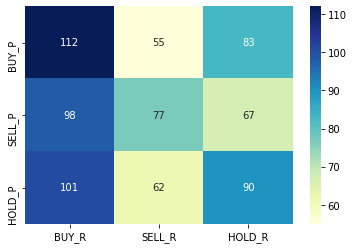

In [144]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_R', 'SELL_R', 'HOLD_R'], 
                        index=['BUY_P', 'SELL_P', 'HOLD_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [107]:
y_pred_train = model_dnn.predict(x_train)

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred_train:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_train2:
    real.append(np.argmax(i))
real_array = np.array(real)    

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(real_array, pred_array)))

Training-set accuracy score: 0.5355


## LSTM + DNN -> Timestep = 1

In [108]:
'''
# define and fit the final model
timer = Timer()
timer.start()

model_lstm = Sequential()

model_lstm.add(LSTM(75, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(50, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(25, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
print(model_lstm.summary())
timer.stop()
'''

"\n# define and fit the final model\ntimer = Timer()\ntimer.start()\n\nmodel_lstm = Sequential()\n\nmodel_lstm.add(LSTM(75, input_shape=(1, dim), return_sequences=True , activation='relu'))\nmodel_lstm.add(Dropout(0.4))\nmodel_lstm.add(Dense(50, activation='relu'))\nmodel_lstm.add(Dropout(0.5))\nmodel_lstm.add(Dense(25, activation='relu'))\nmodel_lstm.add(Dropout(0.2))\nmodel_lstm.add(Dense(3, activation='softmax'))\n\nmodel_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n\nprint('[model] Model Compiled')\nprint(model_lstm.summary())\ntimer.stop()\n"

In [109]:
# define and fit the final model
timer = Timer()
timer.start()

model_lstm_gru_deep = Sequential()

model_lstm_gru_deep.add(LSTM(200, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.2))
model_lstm_gru_deep.add(GRU(150, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.3))
model_lstm_gru_deep.add(LSTM(100, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.5))
model_lstm_gru_deep.add(LSTM(100, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.3))
model_lstm_gru_deep.add(LSTM(100, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.5))
model_lstm_gru_deep.add(LSTM(100, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.3))
model_lstm_gru_deep.add(LSTM(100, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.5))
model_lstm_gru_deep.add(LSTM(100, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.3))
model_lstm_gru_deep.add(GRU(50, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.2))
model_lstm_gru_deep.add(LSTM(50, input_shape=(1, dim), return_sequences=True , activation='relu'))
model_lstm_gru_deep.add(Dropout(0.2))
model_lstm_gru_deep.add(Dense(3, activation='softmax'))

model_lstm_gru_deep.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[model] Model Compiled')
print(model_lstm_gru_deep.summary())
timer.stop()


[model] Model Compiled
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 200)            207200    
_________________________________________________________________
dropout_39 (Dropout)         (None, 1, 200)            0         
_________________________________________________________________
gru_8 (GRU)                  (None, 1, 150)            157950    
_________________________________________________________________
dropout_40 (Dropout)         (None, 1, 150)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 100)            100400    
_________________________________________________________________
dropout_41 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_26 (LSTM)               (N

In [110]:
x_train3 = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_train3.shape
y_train3 = y_train2.reshape(y_train2.shape[0], 1, y_train2.shape[1])
y_train3.shape

x_valid3 = x_valid.reshape(x_valid.shape[0], 1, x_valid.shape[1])
x_valid3.shape
y_valid3 = y_valid2.reshape(y_valid2.shape[0], 1, y_valid2.shape[1])
y_valid3.shape

x_test3 = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
x_test3.shape
y_test3 = y_test2.reshape(y_test2.shape[0], 1, y_test2.shape[1])
y_test3.shape


(745, 1, 3)

In [111]:
timer = Timer()
timer.start()
print('[Model] Training Started')

save_dir=configs['model']['save_dir']
my_model=configs['model']['model_name']
save_fname = os.path.join(save_dir, '%s_model_lstm_gru_deep.h5' % my_model)

batch_size=configs['training']['batch_size']

callbacks = [ ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)]

H = model_lstm_gru_deep.fit( x_train3, y_train3, validation_data=(x_valid3, y_valid3), epochs=100, 
               callbacks=callbacks, workers=1 )

model_lstm_gru_deep.save(save_fname)

print('[Model] Training Completed.')
print('Model saved as %s' % save_fname)

timer.stop()


[Model] Training Started
Train on 6721 samples, validate on 2145 samples
Epoch 1/100
6721/6721 [==============================] - 40s 6ms/step - loss: 1.0987 - accuracy: 0.3189 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 2/100
6721/6721 [==============================] - 23s 3ms/step - loss: 1.0988 - accuracy: 0.3199 - val_loss: 1.0987 - val_accuracy: 0.3273
Epoch 3/100
6721/6721 [==============================] - 22s 3ms/step - loss: 1.0987 - accuracy: 0.3241 - val_loss: 1.0987 - val_accuracy: 0.3273
Epoch 4/100
6721/6721 [==============================] - 22s 3ms/step - loss: 1.0987 - accuracy: 0.3340 - val_loss: 1.0987 - val_accuracy: 0.3273
Epoch 5/100
6721/6721 [==============================] - 22s 3ms/step - loss: 1.0987 - accuracy: 0.3342 - val_loss: 1.0987 - val_accuracy: 0.3273
Epoch 6/100
6721/6721 [==============================] - 28s 4ms/step - loss: 1.0987 - accuracy: 0.3273 - val_loss: 1.0986 - val_accuracy: 0.3375
Epoch 7/100
6721/6721 [============================

6721/6721 [==============================] - 22s 3ms/step - loss: 1.0987 - accuracy: 0.3215 - val_loss: 1.0986 - val_accuracy: 0.3273: 1.0985 - accura - ETA: 15s - loss: 1.0  - ETA: 7s - l - - ETA: 3s -
Epoch 56/100
6721/6721 [==============================] - 22s 3ms/step - loss: 1.0987 - accuracy: 0.3181 - val_loss: 1.0986 - val_accuracy: 0.3375
Epoch 57/100
6721/6721 [==============================] - 24s 4ms/step - loss: 1.0987 - accuracy: 0.3284 - val_loss: 1.0987 - val_accuracy: 0.3273987 -  - ETA: 0s - loss: 1.0987 - accuracy: 0.32
Epoch 58/100
6721/6721 [==============================] - 27s 4ms/step - loss: 1.0987 - accuracy: 0.3300 - val_loss: 1.0986 - val_accuracy: 0.3375
Epoch 59/100
6721/6721 [==============================] - 21s 3ms/step - loss: 1.0987 - accuracy: 0.3226 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 60/100
6721/6721 [==============================] - 21s 3ms/step - loss: 1.0987 - accuracy: 0.3254 - val_loss: 1.0986 - val_accuracy: 0.3273
Epoch 61/100
6

In [125]:
# new instances where we do not know the answer
y_pred = model_lstm_gru_deep.predict(x_test3) 
y_pred

array([[[0.33383337, 0.332856  , 0.33331066]],

       [[0.33383337, 0.332856  , 0.33331066]],

       [[0.33383337, 0.332856  , 0.33331066]],

       ...,

       [[0.33383337, 0.332856  , 0.33331066]],

       [[0.33383337, 0.332856  , 0.33331066]],

       [[0.33383337, 0.332856  , 0.33331066]]], dtype=float32)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


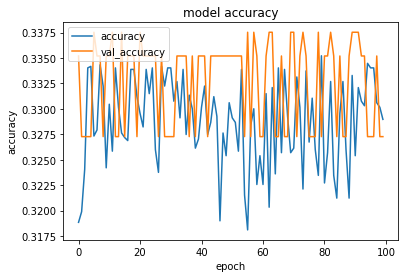

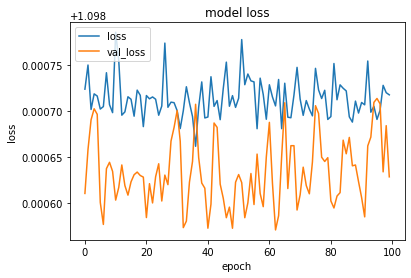

In [113]:
# list all data in history       
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
fig_path = 'accuracy_history.png'
plt.savefig(fig_path)     
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
fig_path = 'loss_history.png'
plt.savefig(fig_path) 
plt.show()

In [114]:
# BUY | SELL | HOLD

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_test3:
    real.append(np.argmax(i))
real_array = np.array(real)    

In [123]:
print(y_pred[10:20])
print(y_test3[10:20])

[[[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]

 [[0.33383337 0.332856   0.33331066]]]
[[[1. 0. 0.]]

 [[1. 0. 0.]]

 [[0. 0. 1.]]

 [[0. 0. 1.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]]


In [116]:
print(pred_array[10:20])
print(real_array[10:20])

[0 0 0 0 0 0 0 0 0 0]
[0 0 2 2 0 0 0 0 0 0]


In [117]:
print('Accuracy Score - DL: ', accuracy_score(real_array, pred_array))

Accuracy Score - DL:  0.33557046979865773


In [118]:
print(classification_report(real_array, pred_array))

              precision    recall  f1-score   support

           0       0.34      1.00      0.50       250
           1       0.00      0.00      0.00       242
           2       0.00      0.00      0.00       253

    accuracy                           0.34       745
   macro avg       0.11      0.33      0.17       745
weighted avg       0.11      0.34      0.17       745



C:\Users\auW10\Anaconda3\envs\phd\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(real_array, pred_array)
confusion_matrix

array([[250,   0,   0],
       [242,   0,   0],
       [253,   0,   0]], dtype=int64)

<AxesSubplot:>

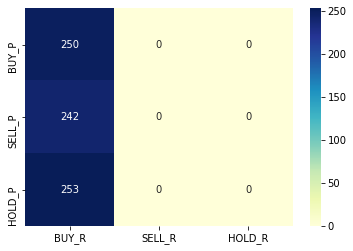

In [120]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_R', 'SELL_R', 'HOLD_R'], 
                        index=['BUY_P', 'SELL_P', 'HOLD_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [121]:
y_pred_train = model_lstm_gru_deep.predict(x_train3)

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred_train:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_train3:
    real.append(np.argmax(i))
real_array = np.array(real)    

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(real_array, pred_array)))

Training-set accuracy score: 0.3340


In [ ]:
# save trained model
#pickle.dump( model_lgbm, open( 'saved_models/model_lgbm_53features.pkl', 'wb' ) )

In [ ]:
#pickle.dump( model_lstm, open( 'saved_models/model_LSTM_DNN_53features.pkl', 'wb' ) )

In [ ]:
model_pickle_lgbm = pickle.load( open( 'saved_models/model_lgbm_53features.pkl', 'rb' ) )

predict_pickle_lgbm = model_pickle_lgbm.predict(x_test)

print('Accuracy Score - LightGBM: ', accuracy_score(y_test, predict_pickle_lgbm))

In [ ]:
model_lgbm2 = lgbm.LGBMClassifier(n_jobs=-1, random_state=0, n_estimators=100, learning_rate=0.001, num_leaves=2**6,
                                subsample=0.9, subsample_freq=1, colsample_bytree=1., verbose=1)

model_lgbm2.fit(x_train, y_train)
predict_lgbm2 = model_lgbm2.predict(x_test)

print('Accuracy Score - LightGBM: ', accuracy_score(y_test, predict_lgbm2))